# Aufgabe 1

## Importe

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Imports for a keras tensorflow model
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import fashion_mnist

## Variablen

In [3]:
epochs = 20
batch_size = 128
sgd = SGD(0.01)

## a) Preparing Dataset (MNIST/Tensorflow)

### Get dataset and prepare train and test sets

In [4]:
# Grab the MNIST dataset
# The dataset is already split into train and test set (with distribution train:60k to test:10k)
print("[INFO] accessing MNIST...")
((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()

# Each image in the MNIST dataset is represented as a 28x28x1, this needs to be flattened to be used by the FFN
trainX = trainX.reshape((trainX.shape[0], 28 * 28 * 1))
testX = testX.reshape((testX.shape[0], 28 * 28 * 1))

# Scale data to the range of [0, 1]
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

[INFO] accessing MNIST...
4423680/4422102 [==============================] - 0s 0us/step


In [5]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

print(trainY)

(60000, 784)
(60000,)
(10000, 784)
(10000,)
[9 0 0 ... 3 0 5]


### Encode data

In [6]:
# One-hot-encoding
# convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

print(trainY)

[[0 0 0 ... 0 0 1]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## b) Feed forward network
Da wir nicht wissen wie unser neuronales Netz für verschiedene Activation Functions performt, probieren wir im Folgenden die Gängigsten.

In [7]:
# Set of activation Functions
# Softmax and exponential activation functions are not working in this setup therefore they are not included in this list
activation_functions = ["relu","sigmoid","tanh", "softplus", "softsign", "selu", "elu"]

In [8]:
# define the 784-256-128-10 architecture with the different activations using Keras
models = []
for ac in activation_functions:
    print(f"Building model with {ac} as activation function")
    model = Sequential()
    model.add(Dense(256, input_shape=(784,), activation=ac))
    model.add(Dense(128, activation=ac))
    model.add(Dense(10, activation="softmax"))
    models.append((model, ac, _))

Building model with relu as activation function
Building model with sigmoid as activation function
Building model with tanh as activation function
Building model with softplus as activation function
Building model with softsign as activation function
Building model with selu as activation function
Building model with elu as activation function


In [9]:
# Train with SGD, Gradient descent (with momentum) optimizer
print("[INFO] training networks...")
for i in range(len(models)):
    model, activation, _ = models[i]
    print(f"\n[Info] {activation = }")
    model.compile(loss="categorical_crossentropy", optimizer=sgd,
                  metrics=["accuracy"])
    H = model.fit(trainX, trainY, validation_data=(testX, testY),
                  epochs=epochs, batch_size=batch_size)
    models[i] = (model, activation, H)

[INFO] training networks...

[Info] activation = 'relu'
Epoch 1/20
469/469 [==============================] - 1s 1ms/step - loss: 1.0514 - accuracy: 0.6830 - val_loss: 0.7213 - val_accuracy: 0.7605
Epoch 2/20
469/469 [==============================] - 1s 1ms/step - loss: 0.6343 - accuracy: 0.7919 - val_loss: 0.6104 - val_accuracy: 0.7892
Epoch 3/20
469/469 [==============================] - 1s 1ms/step - loss: 0.5521 - accuracy: 0.8146 - val_loss: 0.5567 - val_accuracy: 0.8064
Epoch 4/20
469/469 [==============================] - 1s 1ms/step - loss: 0.5098 - accuracy: 0.8264 - val_loss: 0.5360 - val_accuracy: 0.8099
Epoch 5/20
469/469 [==============================] - 1s 1ms/step - loss: 0.4836 - accuracy: 0.8342 - val_loss: 0.5090 - val_accuracy: 0.8224
Epoch 6/20
469/469 [==============================] - 1s 1ms/step - loss: 0.4648 - accuracy: 0.8398 - val_loss: 0.4862 - val_accuracy: 0.8291
Epoch 7/20
469/469 [==============================] - 1s 1ms/step - loss: 0.4506 - accuracy:

## c) Evaluation

In [10]:
def plot_trainingAccLoss(H):
    # plot the training accuracy
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
    plt.title("Training Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

    # plot the training loss
    plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
    plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
    plt.title("Training Loss")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


[INFO] evaluating network...

[Info] activation = 'relu'
              precision    recall  f1-score   support

           0       0.78      0.86      0.82      1000
           1       0.98      0.96      0.97      1000
           2       0.79      0.72      0.75      1000
           3       0.87      0.86      0.86      1000
           4       0.72      0.82      0.77      1000
           5       0.96      0.93      0.94      1000
           6       0.69      0.56      0.62      1000
           7       0.90      0.94      0.92      1000
           8       0.91      0.97      0.94      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.85     10000
weighted avg       0.86      0.86      0.85     10000



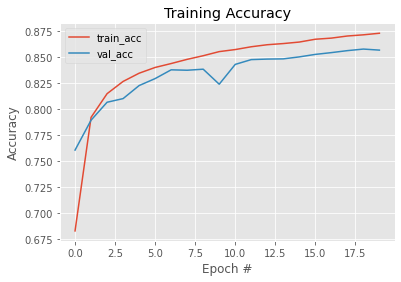

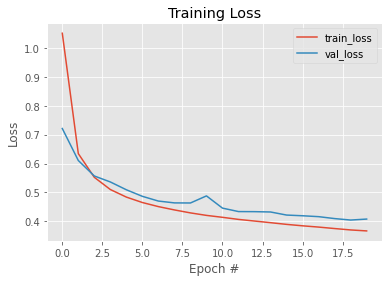


[Info] activation = 'sigmoid'
              precision    recall  f1-score   support

           0       0.72      0.79      0.75      1000
           1       0.97      0.91      0.94      1000
           2       0.59      0.60      0.59      1000
           3       0.74      0.83      0.78      1000
           4       0.58      0.65      0.62      1000
           5       0.84      0.81      0.82      1000
           6       0.42      0.28      0.33      1000
           7       0.83      0.84      0.83      1000
           8       0.92      0.91      0.91      1000
           9       0.86      0.92      0.89      1000

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



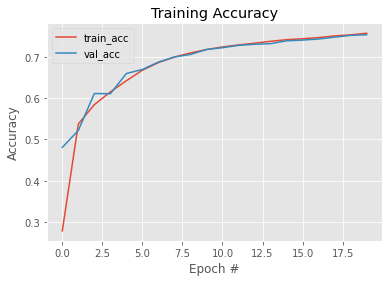

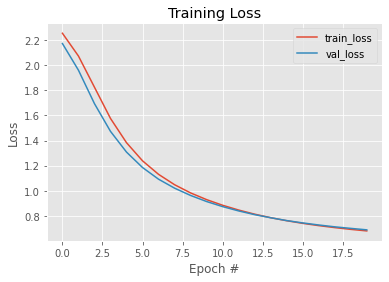


[Info] activation = 'tanh'
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1000
           1       0.98      0.95      0.97      1000
           2       0.76      0.74      0.75      1000
           3       0.84      0.88      0.86      1000
           4       0.78      0.74      0.76      1000
           5       0.95      0.92      0.93      1000
           6       0.62      0.64      0.63      1000
           7       0.90      0.93      0.92      1000
           8       0.94      0.95      0.95      1000
           9       0.94      0.94      0.94      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



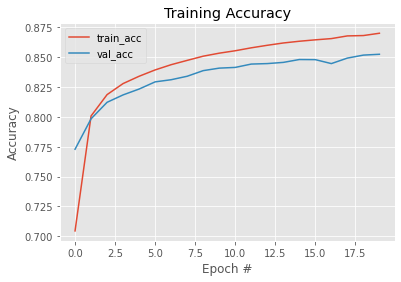

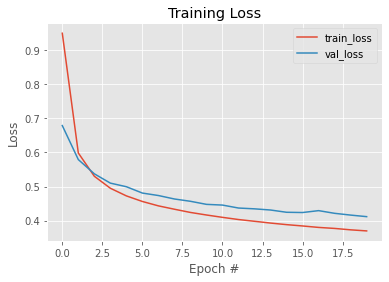


[Info] activation = 'softplus'
              precision    recall  f1-score   support

           0       0.85      0.73      0.79      1000
           1       0.97      0.96      0.96      1000
           2       0.74      0.70      0.72      1000
           3       0.82      0.88      0.85      1000
           4       0.73      0.75      0.74      1000
           5       0.92      0.91      0.92      1000
           6       0.58      0.61      0.59      1000
           7       0.90      0.92      0.91      1000
           8       0.92      0.95      0.94      1000
           9       0.93      0.93      0.93      1000

    accuracy                           0.83     10000
   macro avg       0.84      0.83      0.83     10000
weighted avg       0.84      0.83      0.83     10000



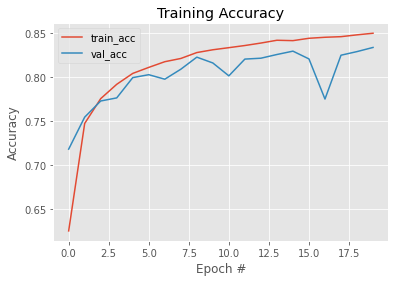

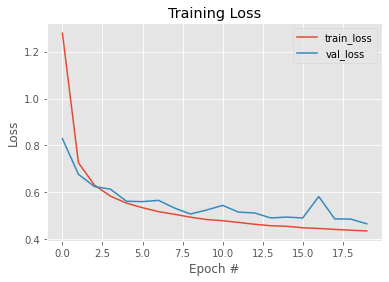


[Info] activation = 'softsign'
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1000
           1       0.98      0.95      0.96      1000
           2       0.72      0.78      0.75      1000
           3       0.85      0.85      0.85      1000
           4       0.74      0.75      0.75      1000
           5       0.94      0.91      0.93      1000
           6       0.65      0.57      0.61      1000
           7       0.91      0.92      0.91      1000
           8       0.93      0.95      0.94      1000
           9       0.92      0.95      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.84      0.85      0.84     10000
weighted avg       0.84      0.85      0.84     10000



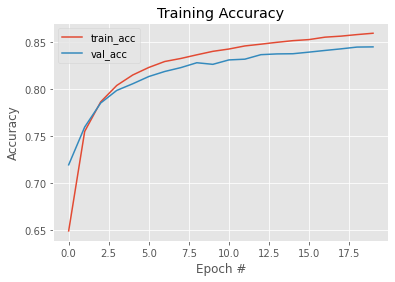

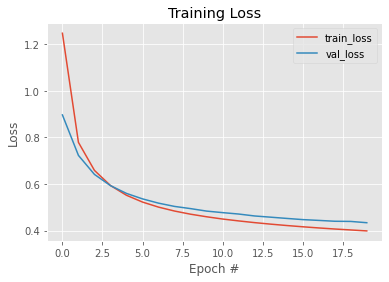


[Info] activation = 'selu'
              precision    recall  f1-score   support

           0       0.84      0.79      0.81      1000
           1       0.98      0.96      0.97      1000
           2       0.78      0.74      0.76      1000
           3       0.85      0.87      0.86      1000
           4       0.75      0.80      0.77      1000
           5       0.96      0.92      0.94      1000
           6       0.64      0.65      0.65      1000
           7       0.89      0.95      0.92      1000
           8       0.93      0.96      0.95      1000
           9       0.96      0.93      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



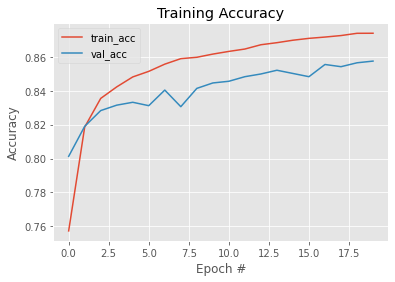

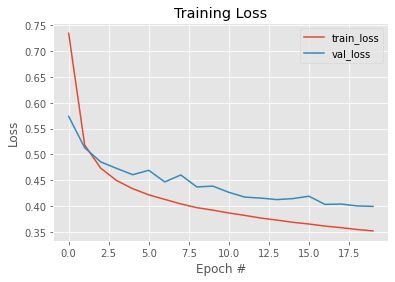


[Info] activation = 'elu'
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1000
           1       0.98      0.96      0.97      1000
           2       0.79      0.70      0.74      1000
           3       0.84      0.87      0.86      1000
           4       0.69      0.85      0.76      1000
           5       0.92      0.94      0.93      1000
           6       0.67      0.56      0.61      1000
           7       0.93      0.90      0.91      1000
           8       0.93      0.96      0.95      1000
           9       0.93      0.95      0.94      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



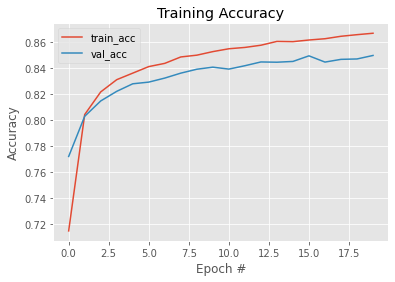

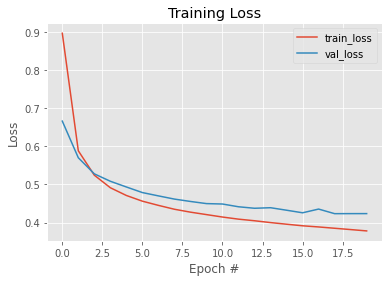

In [11]:
print("[INFO] evaluating network...")
for model, activation, H in models:
    print(f"\n[Info] {activation = }")
    predictions = model.predict(testX, batch_size=batch_size)
    print(classification_report(testY.argmax(axis=1),
                                predictions.argmax(axis=1),
                                target_names=[str(x) for x in lb.classes_]))
    plot_trainingAccLoss(H)

## d) Trend in train and test accuracies over the epochs
In den Plots ist gut zu erkennen, dass sich in den meisten Fällen mit jeder Epoche die Accuracy verbessert. Im Gegensatz zum mnist Datensatz nähern sich die Trainingsdaten und Testdaten im fashion_mnist Datensatz nicht an. Die Differenz wird mit den Epochen größer, Ausnahme scheint die sigmoid Aktivierungsfunktion zu sein.

## g)
Wir betrachten nun ein ähnliches neuronales Netzwerk wie in den vorherigen Teilaufgaben. Anders ist hier nun, dass wir mit einem Netzwerk ohne Hidden Layers beginnen und diese Schritt für Schritt hinzufügen. Wir betrachten anschließend, jeweils für die Trainings- sowie die Testdaten, die Accuracy entsprechend der Epoche für jede der Netzwerkvarianten.

In [12]:
def getLayerSize(layer_number: int):
    return 128
    # Constant at the moment
    assert layer_number > 0
    if layer_number < 5:
        return 2**(8-layer_number)
    else:
        return 16


In [13]:
def buildModel(numHiddenLayers: int, ac):
    model = Sequential()
    model.add(Dense(256, input_shape=(784,), activation=ac))
    for i in range(numHiddenLayers):
        model.add(Dense(getLayerSize(i), activation= ac))
    model.add(Dense(10, activation="softmax"))
    return model

In [14]:
max_hidden_layers = 10
def increaseLayers(ac = "sigmoid"):
    histories = []
    for i in range(max_hidden_layers):
        model = buildModel(i, ac)
        model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
        H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=epochs, batch_size=batch_size, verbose=0)
        histories.append((H, i))
    return histories

In [15]:
print("[INFO] training network with sigmoid activation")
hist_s = increaseLayers()

print("[INFO] training network with relu activation")
hist_r = increaseLayers("relu")

[INFO] training network with sigmoid activation
[INFO] training network with relu activation


In [16]:
cmap = plt.get_cmap('gist_rainbow')
colors = [cmap(i) for i in np.linspace(0, 1, max_hidden_layers)]

def plotHistory(histories):
    plt.style.use("ggplot")
    plt.figure()
    for i in range(len(histories)):
        history, rep = histories[i]
        plt.plot(np.arange(0, epochs), history.history["accuracy"], color=colors[i], label="train_acc" + str(rep))
        plt.plot(np.arange(0, epochs), history.history["val_accuracy"], color=colors[i], label="val_acc" + str(rep), linestyle="dotted")
    plt.title("Training Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Accuracy")
    plt.legend(bbox_to_anchor=(1.05,1), loc="upper left", ncol=2)
    plt.show()

[INFO] evaluating network with sigmoid activation


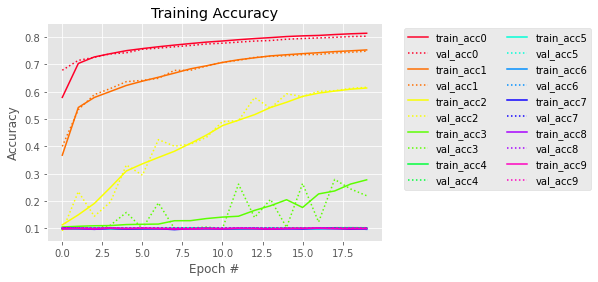

[INFO] evaluating network with relu activation


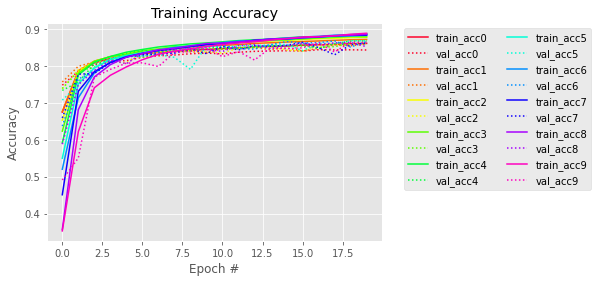

In [17]:
print("[INFO] evaluating network with sigmoid activation")
plotHistory(hist_s)
print("[INFO] evaluating network with relu activation")
plotHistory(hist_r)